In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./mbti_1.csv")

In [3]:
dataset.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
dataset.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [5]:
dataset.type.value_counts()

type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64

### Create columns for each type seperately

In [6]:
def take_row(row):
    type = row.iloc[0]

    if type[0] == 'I': I = 1
    elif type[0] == 'E': I =  0
    else: print('I-E value not found')

    if type[1] == 'N': N = 1
    elif type[1] == 'S': N =  0
    else: print('N-S value not found')

    if type[2] == 'T': T = 1
    elif type[2] == 'F': T =  0
    else: print('T-F value not found')

    if type[3] == 'J': J = 1
    elif type[3] == 'P': J =  0
    else: print('J-P value not found')

    return pd.Series({"IE" : I, "NS": N, "TF": T, "JP": J})

dataset = dataset.join(dataset.apply(lambda row: take_row(row), axis = 1))
dataset.head()

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


In [7]:
print ("Introversion (I) /  Extroversion (E):\t", dataset['IE'].value_counts()[0], " / ", dataset['IE'].value_counts()[1])
print ("Intuition (N) / Sensing (S):\t\t", dataset['NS'].value_counts()[0], " / ", dataset['NS'].value_counts()[1])
print ("Thinking (T) / Feeling (F):\t\t", dataset['TF'].value_counts()[0], " / ", dataset['TF'].value_counts()[1])
print ("Judging (J) / Perceiving (P):\t\t", dataset['JP'].value_counts()[0], " / ", dataset['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) / Sensing (S):		 1197  /  7478
Thinking (T) / Feeling (F):		 4694  /  3981
Judging (J) / Perceiving (P):		 5241  /  3434


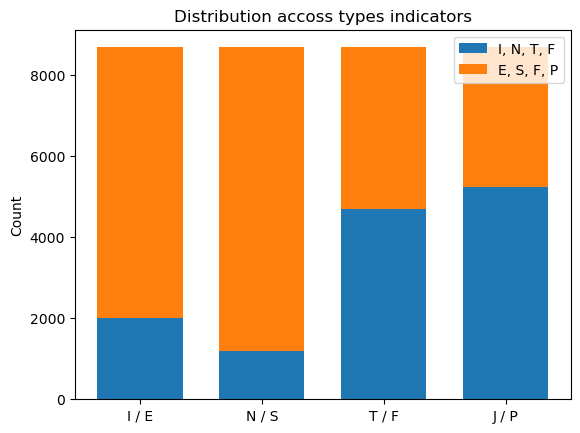

In [8]:
N = 4
bottom = (dataset['IE'].value_counts()[0], dataset['NS'].value_counts()[0], dataset['TF'].value_counts()[0], dataset['JP'].value_counts()[0])
top = (dataset['IE'].value_counts()[1], dataset['NS'].value_counts()[1], dataset['TF'].value_counts()[1], dataset['JP'].value_counts()[1])

ind = np.arange(N)    
width = 0.7           

p1 = plt.bar(ind, bottom, width, label="I, N, T, F")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P") 

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()

plt.show()

In [9]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopwords = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

def preprocessing(post):
    text = post

    # remove the pipe character |
    text = text.replace("|","")

    # remove the links
    text = re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", text)

    # remove all the punctuations and keep the words
    text = re.sub("[^a-zA-Z]", " ", text).lower()

    # remove the unwanted spaces > 1
    text = re.sub(' +', ' ', text)

    # tokenize the text
    tokens = word_tokenize(text)

    # remove the stopwords, mbit mentions, and lammetization
    temp = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords]
    text = " ".join([word for word in temp if word not in [x.lower() for x in unique_type_list]])
    
    return text.strip()

In [10]:
dataset["cleaned_text"] = dataset["posts"].apply(preprocessing)

In [11]:
dataset.head()

,type,posts,IE,NS,TF,JP,cleaned_text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1,moment sportscenter top ten play prankswhat li...
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0,finding lack post alarming sex boring position...
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0,good one course say know blessing curse absolu...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1,dear enjoyed conversation day esoteric gabbing...
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1,fired another silly misconception approaching ...


In [12]:
data = dataset.drop(["posts", "type"], axis = 1)

In [13]:
data.describe()

,IE,NS,TF,JP
count,8675.000000,8675.000000,8675.000000,8675.000000
mean,0.769568,0.862017,0.458905,0.395850
std,0.421134,0.344902,0.498337,0.489061
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [14]:
data.head()

,IE,NS,TF,JP,cleaned_text
0,1,1,0,1,moment sportscenter top ten play prankswhat li...
1,0,1,1,0,finding lack post alarming sex boring position...
2,1,1,1,0,good one course say know blessing curse absolu...
3,1,1,1,1,dear enjoyed conversation day esoteric gabbing...
4,0,1,1,1,fired another silly misconception approaching ...


### Build Model

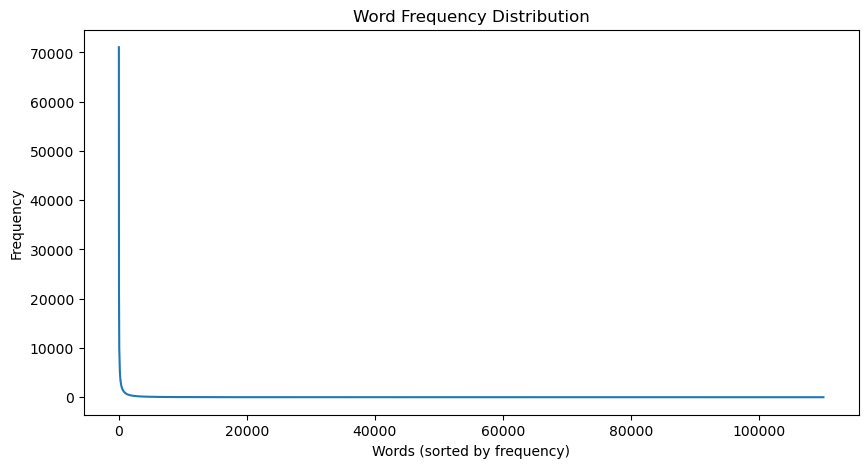

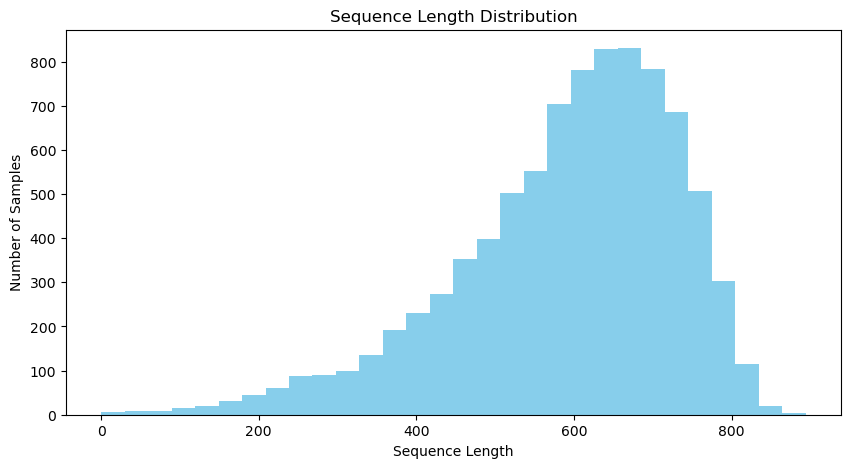

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['cleaned_text'])  


word_counts = tokenizer.word_counts
sequence_lengths = [len(seq.split()) for seq in data['cleaned_text']]


sorted_word_counts = sorted(word_counts.values(), reverse=True)
plt.figure(figsize=(10, 5))
plt.plot(sorted_word_counts)
plt.title("Word Frequency Distribution")
plt.xlabel("Words (sorted by frequency)")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(10, 5))
plt.hist(sequence_lengths, bins=30, color='skyblue')
plt.title("Sequence Length Distribution")
plt.xlabel("Sequence Length")
plt.ylabel("Number of Samples")
plt.show()


max_length = int(np.percentile(sequence_lengths, 90))
max_tokens = min(len(word_counts), 10000)  


In [16]:
max_length, max_tokens

(749, 10000)